In [1]:
import pandas as pd
import numpy as np
import requests
import json

import matplotlib.pyplot as plt
from scipy.stats import linregress

from pathlib import Path

In [2]:
CA_cases_per_100_path = Path("Datasets/CA_adults_with_diabetes_per_100.csv")
CA_cases_per_100_data = pd.read_csv(CA_cases_per_100_path)

In [3]:
CA_cases_per_100_data.head()

,Geography,Year,Strata,Strata Name,Percent,Lower 95% CL,Upper 95% CL,Standard Error
0,California,2018,Total population,Total population,10.4,8.9,11.9,0.8
1,California,2018,Race-Ethnicity,White,8.4,6.9,9.9,0.8
2,California,2018,Race-Ethnicity,African-American,12.3,6.0,18.6,3.2
3,California,2018,Race-Ethnicity,Asian,8.5,3.2,13.9,2.7
4,California,2018,Race-Ethnicity,Hispanic,12.1,9.0,15.1,1.6


# How does California diabetes prevalence change overtime? 

In [4]:
#just cause
data_count = len(CA_cases_per_100_data)
data_count

147

In [5]:
#group by year
year = CA_cases_per_100_data.groupby("Year")
year.groups

{2012: [126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146], 2013: [105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125], 2014: [84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104], 2015: [63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83], 2016: [42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62], 2017: [21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41], 2018: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]}

In [6]:
reduced_df = CA_cases_per_100_data[["Year","Strata Name","Percent"]]
reduced_df

,Year,Strata Name,Percent
0,2018,Total population,10.4
1,2018,White,8.4
2,2018,African-American,12.3
3,2018,Asian,8.5
4,2018,Hispanic,12.1
...,...,...,...
142,2012,"$25,000 to $34,999",11.9
143,2012,"$35,000 to $49,999",9.5
144,2012,"$50,000 and above",6.3
145,2012,Male,9.7


In [7]:
total_pop = reduced_df.loc[reduced_df["Strata Name"] =="Total population"]
total_pop

,Year,Strata Name,Percent
0,2018,Total population,10.4
21,2017,Total population,8.2
42,2016,Total population,10.2
63,2015,Total population,9.0
84,2014,Total population,9.4
105,2013,Total population,9.5
126,2012,Total population,9.2


In [8]:
clean_pop = total_pop.set_index("Year").drop(columns = "Strata Name")
clean_pop

,Percent
Year,
2018,10.4
2017,8.2
2016,10.2
2015,9.0
2014,9.4
2013,9.5
2012,9.2


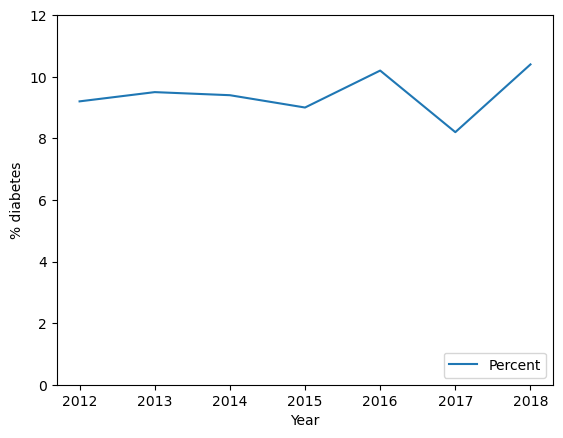

In [9]:
#create line plot but the lines are connected
clean_pop.plot(xlabel = "Year", ylabel = "% diabetes")
plt.ylim(0,12)
plt.legend(loc="lower right")

In [10]:
clean_pop = clean_pop.reset_index()
clean_pop

,Year,Percent
0,2018,10.4
1,2017,8.2
2,2016,10.2
3,2015,9.0
4,2014,9.4
5,2013,9.5
6,2012,9.2


In [11]:
clean_pop["Percent"] = clean_pop["Percent"]/100
clean_pop = clean_pop.rename(columns = {"Percent":"Diabetes Prevalence"})
clean_pop

,Year,Diabetes Prevalence
0,2018,0.104
1,2017,0.082
2,2016,0.102
3,2015,0.090
4,2014,0.094
5,2013,0.095
6,2012,0.092


In [12]:
# Dept. of Finance total population in 2018: 39,557,045
# Dept. of Finance Total Population in 2012: 38,041,430
pop_2018 = 39557045
pop_2012 = 38041430

In [13]:
estimated_diabetes_2018 = clean_pop.loc[clean_pop["Year"] == 2018]["Diabetes Prevalence"].iloc[0] * pop_2018
estimated_diabetes_2018
# 4,913,933

4113932.68

In [14]:
estimated_diabetes_2012 = clean_pop.loc[clean_pop["Year"] == 2012]["Diabetes Prevalence"].iloc[0] * pop_2012
estimated_diabetes_2012
# 3,499,812

3499811.56

In [15]:
# HELP
# 2018 people with dm - 2012 people with dm 
change_2018_2012 = estimated_diabetes_2018 - estimated_diabetes_2012
change_2018_2012
# 614,121

614121.1200000001

In [16]:
# HELP
# (pop_2018 - pop_2012) /pop_2012 *100 = % increase in diabetes population
delta_dm_pop = ((change_2018_2012) / estimated_diabetes_2012) * 100
delta_dm_pop

17.547262458896505

In [17]:
#pop_2018 = clean_pop.loc[clean_pop["Year"] == 2018]
#pop_2018

In [18]:
#dm_pop_2018 = clean_pop.loc[clean_pop["Year"] == 2018, "Percent"]/100
#dm_pop_2018

In [19]:
# Dept. of Finance total population in 2018: 39,557,045

#dm_numbers_2018 = dm_pop_2018 * 39557045
#dm_numbers_2018

In [20]:
#pop_2012 = clean_pop.loc[clean_pop["Year"] == 2012]
#pop_2012

In [21]:
#dm_pop_2012 = clean_pop.loc[clean_pop["Year"] == 2012, "Percent"]/100
#dm_pop_2012

In [22]:
# Dept. of Finance Total Population in 2012: 38,041,430

#dm_numbers_2012 = dm_pop_2012 * 38041430
#dm_numbers_2012

In [34]:
total2018_population = 39557045
total2012_population = 38041430
change_in_population = total2018_population - total2012_population
change_in_population
# 1,515,615

1515615

In [35]:
percentage_change = (total2018_population/total2012_population) * 100
percentage_change

103.9841167905623

### Analysis: 
There has been a 1.2 % increase in California residents being diagnosed with diabetes between 2012 and 2018.
In 2012, there were 3,499,812 residents with diabetes and 5 years later in 2018 there were 4,113,933 people with diabetes. This is 614,121 more people with diabetes. The data percentages already take into account the changes in population each year.

# In California, does a particular race have more diabetes than others? 

In [25]:
CA_diabetes_race_path = Path("Datasets/CA_adults_with_diabetes_per_100.csv")
CA_diabetes_race_data = pd.read_csv(CA_cases_per_100_path)

In [26]:
CA_diabetes_race_data.head()

,Geography,Year,Strata,Strata Name,Percent,Lower 95% CL,Upper 95% CL,Standard Error
0,California,2018,Total population,Total population,10.4,8.9,11.9,0.8
1,California,2018,Race-Ethnicity,White,8.4,6.9,9.9,0.8
2,California,2018,Race-Ethnicity,African-American,12.3,6.0,18.6,3.2
3,California,2018,Race-Ethnicity,Asian,8.5,3.2,13.9,2.7
4,California,2018,Race-Ethnicity,Hispanic,12.1,9.0,15.1,1.6


In [27]:
CA_diabetes_race_data.columns

Index(['Geography', 'Year', 'Strata', 'Strata Name', 'Percent', 'Lower 95% CL',
       'Upper 95% CL', 'Standard Error'],
      dtype='object')

In [28]:
reduced_df = CA_diabetes_race_data.loc[CA_diabetes_race_data["Strata"] == "Race-Ethnicity"]
reduced_df = reduced_df[["Year", 'Strata Name', "Percent"]]
Race_DF = reduced_df.rename(columns = {"Strata Name":"Race"})
Race_DF

,Year,Race,Percent
1,2018,White,8.4
2,2018,African-American,12.3
3,2018,Asian,8.5
4,2018,Hispanic,12.1
22,2017,White,7.6
23,2017,African-American,12.1
24,2017,Asian,4.4
25,2017,Hispanic,9.7
43,2016,White,9.0
44,2016,African-American,10.7


In [29]:
#Race_DF = reduced_df.loc[(reduced_df["Race"] == 'Asian')|(reduced_df["Race"] == 'White')|(reduced_df["Race"] == 'African-American')|(reduced_df["Race"] == 'Hispanic')]
#Race_DF

In [30]:
pivot_table = Race_DF.pivot_table(index= 'Year', columns= 'Race', values= 'Percent')

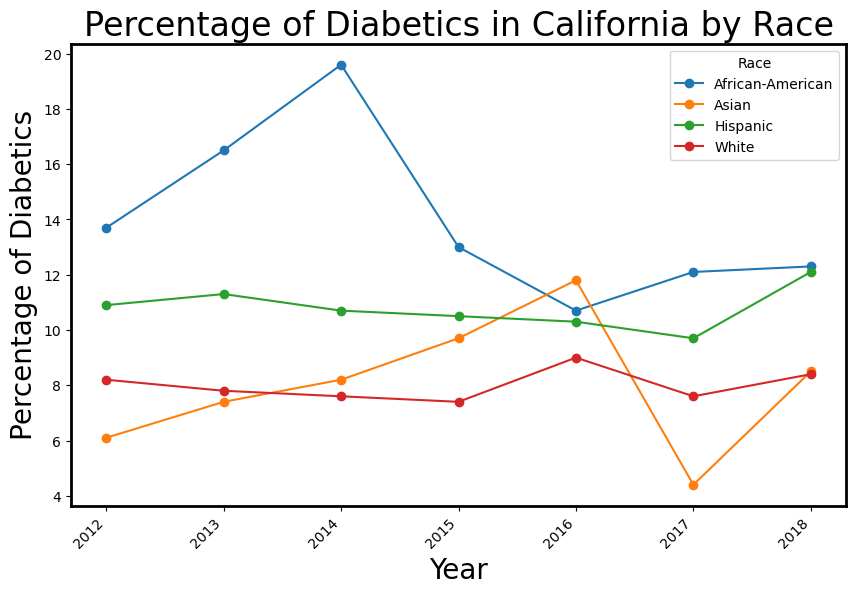

In [31]:
pivot_table.plot(kind= 'line', marker= 'o', figsize=(10,6))
plt.xlabel('Year', fontsize=20)
plt.ylabel('Percentage of Diabetics', fontsize=20)
plt.title('Percentage of Diabetics in California by Race', fontsize=24)
plt.legend(title='Race', loc='best')
plt.xticks(pivot_table.index, rotation=45, ha='right')
plt.gca().spines['left'].set_linewidth(2)
plt.gca().spines['right'].set_linewidth(2)
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['top'].set_linewidth(2)
plt.show()

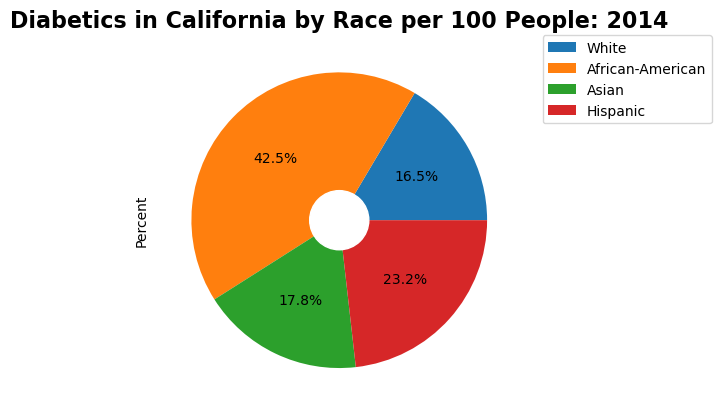

In [43]:
Race_DF_2014 = Race_DF.loc[Race_DF["Year"] == 2014] 
ax = Race_DF_2014.plot(x = "Race", y = "Percent", kind = "pie", legend = True, autopct = '%1.1f%%', labels= None)
ax.set_title("Diabetics in California by Race per 100 People: 2014", fontsize=16, fontweight='bold')
plt.legend(Race_DF_2014["Race"], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.gca().add_artist(plt.Circle((0, 0), 0.2, color='White'))

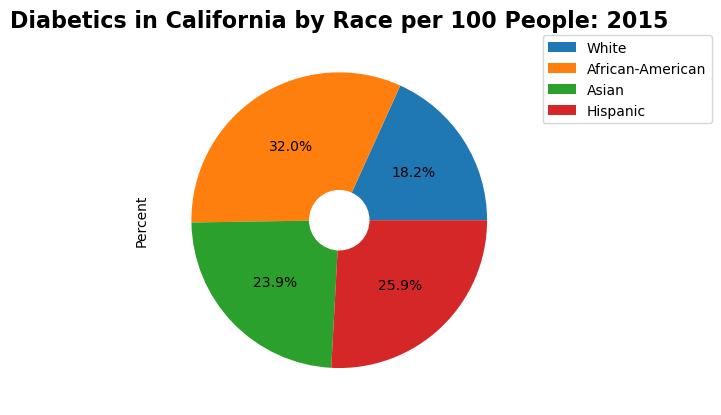

In [58]:
Race_DF_2015 = Race_DF.loc[Race_DF["Year"] == 2015] 
ax = Race_DF_2015.plot(x = "Race", y = "Percent", kind = "pie", legend = True, autopct = '%1.1f%%', labels= None)
ax.set_title("Diabetics in California by Race per 100 People: 2015", fontsize=16, fontweight='bold')
plt.legend(Race_DF_2015["Race"], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.gca().add_artist(plt.Circle((0, 0), 0.2, color='White'))

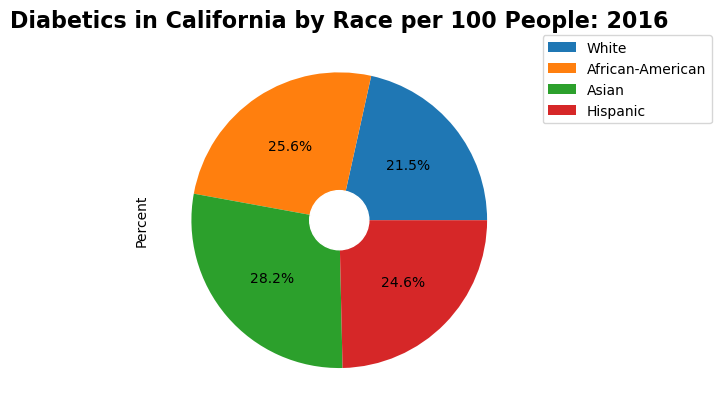

In [57]:
Race_DF_2016 = Race_DF.loc[Race_DF["Year"] == 2016] 
ax = Race_DF_2016.plot(x = "Race", y = "Percent", kind = "pie", legend = True, autopct = '%1.1f%%', labels= None)
ax.set_title("Diabetics in California by Race per 100 People: 2016", fontsize=16, fontweight='bold')
plt.legend(Race_DF_2016["Race"], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.gca().add_artist(plt.Circle((0, 0), 0.2, color='White'))

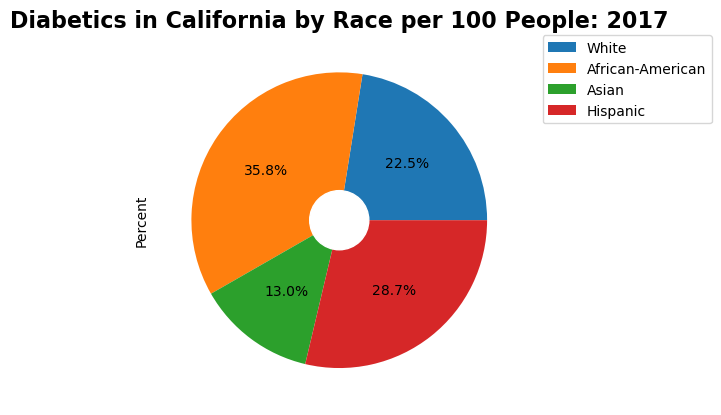

In [55]:
Race_DF_2017 = Race_DF.loc[Race_DF["Year"] == 2017] 
ax = Race_DF_2017.plot(x = "Race", y = "Percent", kind = "pie", legend = True, autopct = '%1.1f%%', labels= None)
ax.set_title("Diabetics in California by Race per 100 People: 2017", fontsize=16, fontweight='bold')
plt.legend(Race_DF_2017["Race"], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.gca().add_artist(plt.Circle((0, 0), 0.2, color='White'))

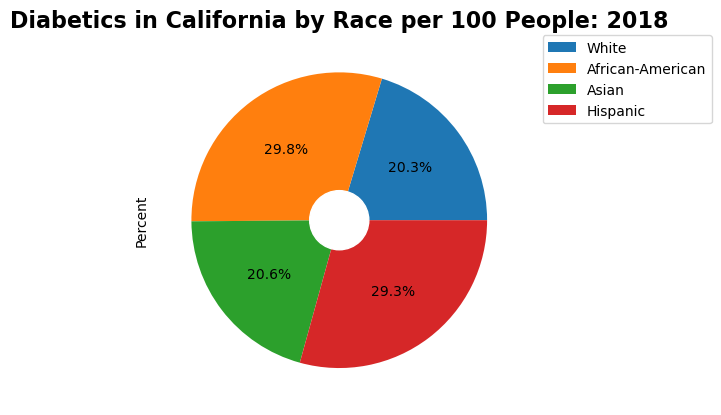

In [56]:
Race_DF_2018 = Race_DF.loc[Race_DF["Year"] == 2018] 
ax = Race_DF_2018.plot(x = "Race", y = "Percent", kind = "pie", legend = True, autopct = '%1.1f%%', labels= None)
ax.set_title("Diabetics in California by Race per 100 People: 2018", fontsize=16, fontweight='bold')
plt.legend(Race_DF_2018["Race"], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.gca().add_artist(plt.Circle((0, 0), 0.2, color='White'))